In [1]:
%load_ext lab_black

from puzzles import load

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [4]:
from tqdm import tqdm

In [8]:
def generate_labirynth(side: int = 20, shift: int = 0, favorite_number: int = 1358):
    A = np.ones([side, side], dtype=np.uint8)
    for x1 in tqdm(range(side)):
        for y1 in range(side):
            x = x1 - shift
            y = y1 - shift
            z = x * x + 3 * x + 2 * x * y + y + y * y + favorite_number
            if Counter(f"{z:b}")["1"] % 2 == 1:
                A[y, x] = 0
    return A


# def find_path(matrix, start, end):
#     grid = Grid(matrix=matrix)
#     start = grid.node(*start)
#     end = grid.node(*end)
#     return AStarFinder().find_path(start, end, grid)

In [9]:
int(load(13).strip())

1358

In [11]:
A = generate_labirynth(side=100, shift=0, favorite_number=1358)
# len(find_path(A, (1, 1), (39, 31))[0]) - 1

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1532.22it/s]


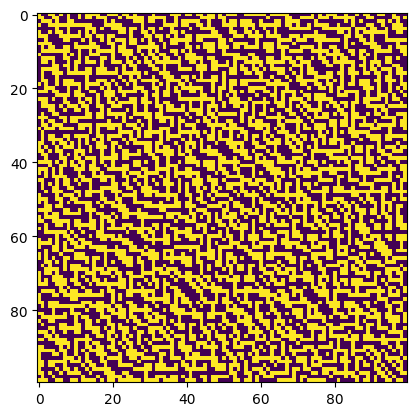

In [12]:
plt.imshow(A)

In [42]:
def printM(A):
    s = ""
    for row in A:
        s += "".join(["#.O"[c] for c in row]) + "\n"
    print(s)

In [53]:
len(find_path(A, (1, 1), (7, 4))[0]) - 1

11

In [50]:
for x, y in find_path(A, (1, 1), (7, 4))[0]:
    if A[y, x] == 0:
        raise
    A[y, x] = 2

In [51]:
printM(A)

.#.####.##
.O#..#...#
#OOO.##...
###O#.###.
.##OO#OO#.
..##OOO.#.
#...##.###
.##..#.##.
#.###....#
###.####.#



In [ ]:
.#.####.##
..#..#...#
#....##...
###.#.###.
.##..#..#.
..##....#.
#...##.###

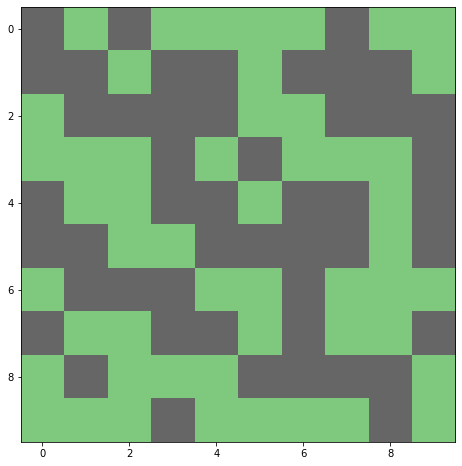

In [33]:
plt.figure(figsize=(8, 8))
plt.imshow(A, cmap="Accent")

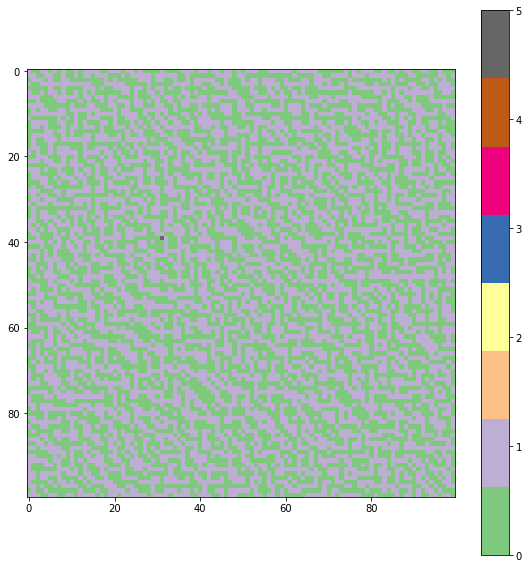

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(A, cmap="Accent")
plt.colorbar()
plt.tight_layout()

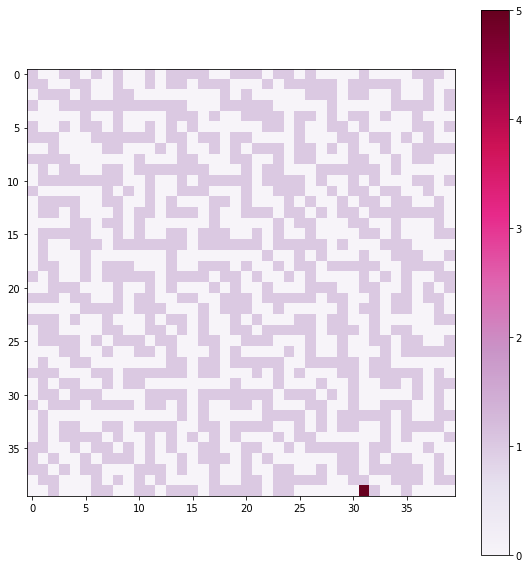

In [24]:
plt.figure(figsize=(8, 8))

plt.imshow(A[:40, :40], cmap="PuRd")
plt.colorbar()
plt.tight_layout()

In [73]:
grid = Grid(matrix=A)

start = grid.node(1, 1)
end = grid.node(9, 3)

finder = AStarFinder()
path, runs = finder.find_path(start, end, grid)

print("operations:", runs, "path length:", len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 11 path length: 11
+----------+
| ##  # # #|
| s##  ## #|
|#xxx# ##  |
| ##xxxxxxe|
|##### ## #|
| ## #  # #|
|   ###    |
|## ####  #|
|    ######|
|# #  ##  #|
+----------+


In [41]:
runs, path = find_path(1 - A, start=(1,1), end=(7,4))

print("operations:", runs, "path length:", len(path))
print(grid.grid_str(path=path, start=start, end=end))

TypeError: object of type 'int' has no len()

In [64]:
def get_neigbs(lab, x, y):
    ns = []
    if y > 0 and lab[x, y - 1] == 0:
        ns.append((x, y - 1))
    if x > 0 and lab[x - 1, y] == 0:
        ns.append((x - 1, y))
    if x < lab.shape[1] and lab[x + 1, y] == 0:
        ns.append((x + 1, y))
    if y < lab.shape[0] and lab[x, y + 1] == 0:
        ns.append((x, y + 1))
    return ns

In [65]:
def find_path(lab, paths):
    all_new_paths = []
    for path in paths:
        last = path[-1]
        ns = get_neigbs(lab, *last)
        if len(ns) == 0 or all([p in path for p in ns]):
            continue
        for n in ns:
            if n in path:
                continue
            new_path = path.copy() + [n]
            all_new_paths.append(new_path)
    return all_new_paths

In [66]:
paths = [[(1, 1)]]
while True:
    paths = find_path(A, paths)
    if any([p[-1] == (31, 39) for p in paths]):
        break